In [35]:
import pandas as pd
import numpy as np
pd.pandas.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_disease.csv')

In [3]:
df.shape

(303, 14)

## missing data

In [6]:
missing = [i for i in df.columns if df[i].isnull().sum()>0]

In [7]:
missing
# no column has missing values

[]

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Meta-data

In [ ]:
# 9 cp: chest pain type
#-- Value 1: typical angina
#-- Value 2: atypical angina
#-- Value 3: non-anginal pain
#-- Value 4: asymptomatic

# 10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)

# 16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

# 19 restecg: resting electrocardiographic results
#-- Value 0: normal
#-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

# 32 thalach: maximum heart rate achieved

# 38 exang: exercise induced angina (1 = yes; 0 = no)

# 44 ca: number of major vessels (0-3) colored by flourosopy

# 51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

# 58 num: diagnosis of heart disease (angiographic disease status)
#-- Value 0: < 50% diameter narrowing
#-- Value 1: > 50% diameter narrowing
#(in any major vessel: attributes 59 through 68 are vessels)

## Univariables analysis

### Numerical columns

In [38]:
num_cols = ['age', 'trestbps', 'chol', 'thalach','oldpeak']

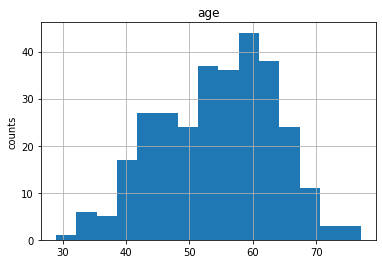

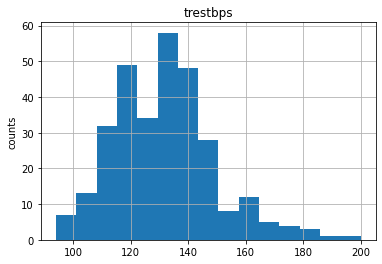

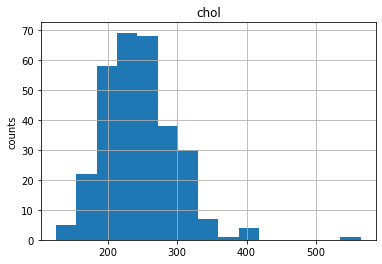

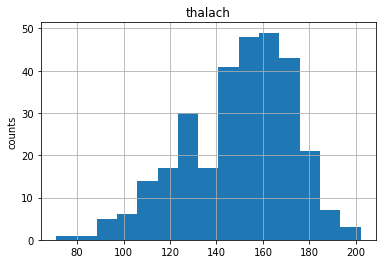

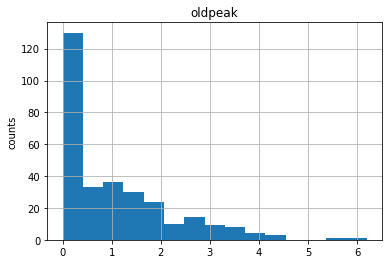

In [49]:
def analyze_num_cols(var, df):
    fig, ax = plt.subplots()
    df[var].hist(bins=15)
    ax.set_title(var)
    ax.set_ylabel('counts')

for var in num_cols:
    analyze_num_cols(var, df)

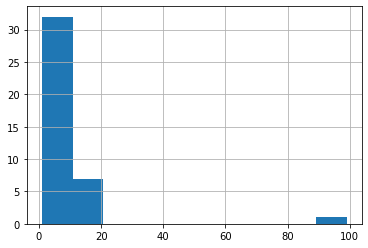

In [12]:
df.oldpeak.value_counts().hist()

In [13]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

### Outliers

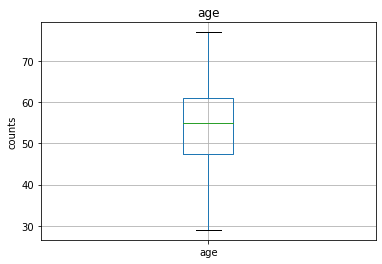

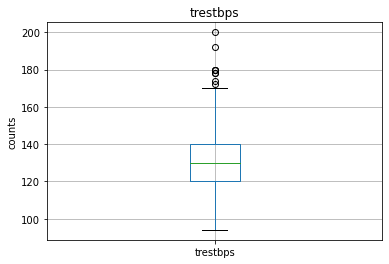

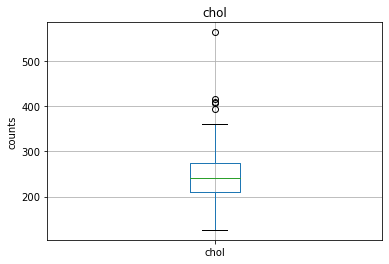

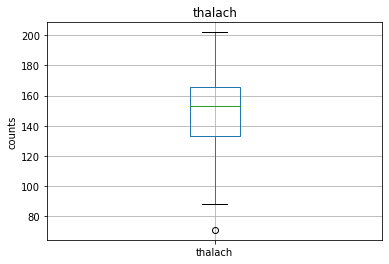

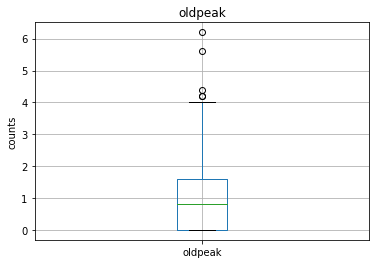

In [64]:
def find_outliers(var, df):
    fig,ax = plt.subplots()
    df.boxplot(column=var)
    ax.set_title(var)
    ax.set_ylabel('counts')
for var in num_cols:
    find_outliers(var, df)

### Categorical columns

In [52]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

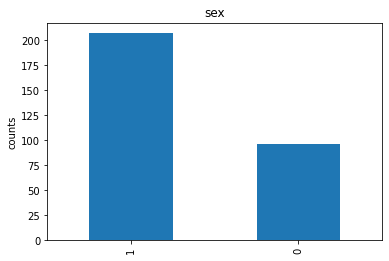

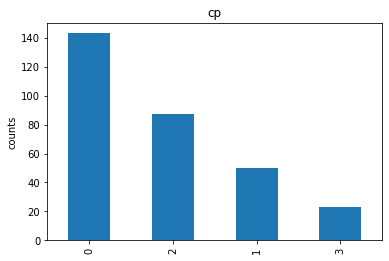

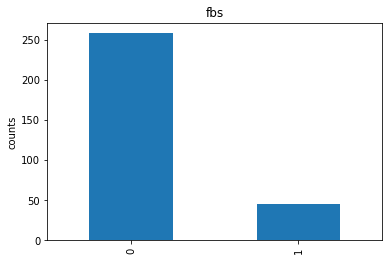

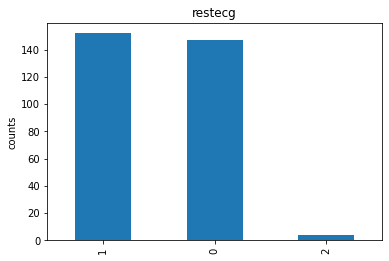

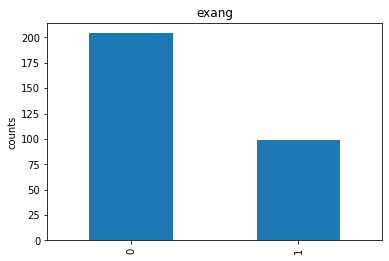

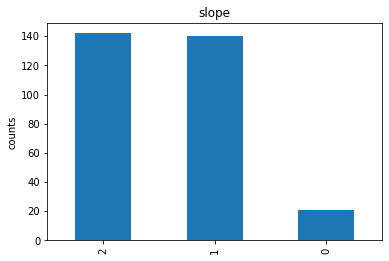

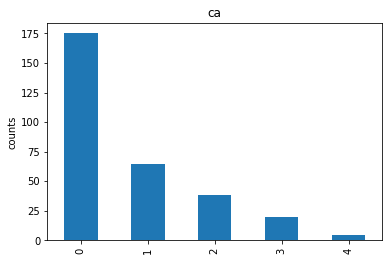

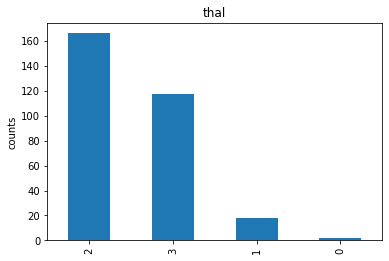

In [60]:
def cat_cols_counts(var, df):
    fig,ax = plt.subplots()
    df[var].value_counts().plot.bar()
    ax.set_title(var)
    ax.set_ylabel('counts')

for var in cat_cols:
    cat_cols_counts(var, df)

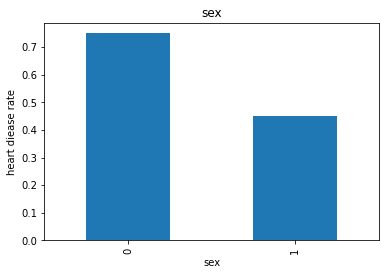

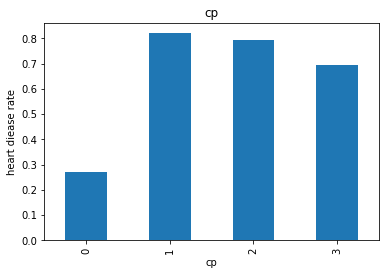

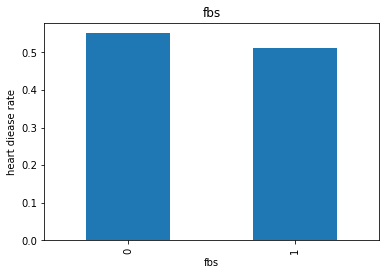

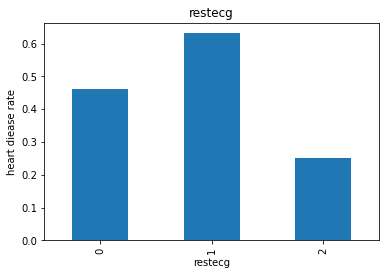

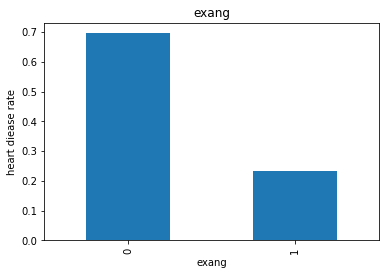

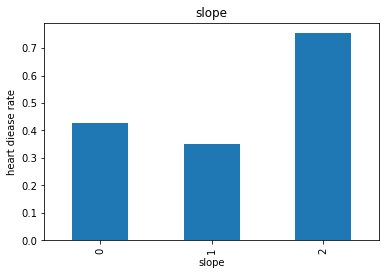

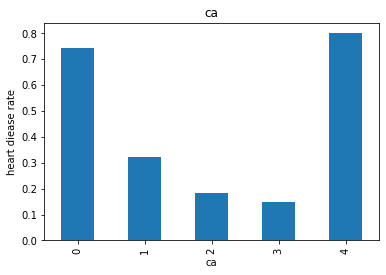

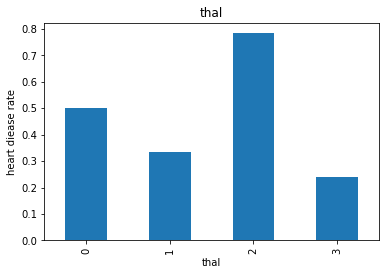

In [55]:
def analyze_cat_cols(var, df):
    df.groupby(var)['target'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('heart diease rate')
    plt.show()

for var in cat_cols:
    analyze_cat_cols(var, df)

### Detect rare labels

In [76]:
def rare_labels(var, df, rare_perc):
    tmp = df.groupby(var)['target'].count()/len(df)
    return tmp[tmp<rare_perc]
for var in cat_cols:
    print(rare_labels(var, df, 0.01))
    print()

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

thal
0    0.006601
Name: target, dtype: float64



In [78]:
df.thal.value_counts()
# 0 in thal is a rare label with only o.66% existence in this column

2    166
3    117
1     18
0      2
Name: thal, dtype: int64